# Исследование поведения пользователей сервиса аренды самокатов



**Описание проекта**

В исходных данных сервиса аренды самокатов GoFast - данные о некоторых пользователях из нескольких городов, а также об их поездках и подписках.

Основная задача - проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
  * абонентская плата отсутствует;
  * стоимость одной минуты поездки — 8 рублей;
  * стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
  * абонентская плата — 199 рублей в месяц;
  * стоимость одной минуты поездки — 6 рублей;
  * стоимость старта — бесплатно.

**Описание данных**

Датасет `users_go`:
* user_id	- уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type	- тип подписки (free, ultra).

Датасет `rides_go`:
* user_id	- уникальный идентификатор пользователя;
* distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date	- дата совершения поездки.

Датасет `subscriptions_go`:
* subscription_type	- тип подписки;
* minute_price	- стоимость одной минуты поездки по данной подписке;
* start_ride_price	- стоимость начала поездки;
* subscription_fee	- стоимость ежемесячного платежа.

## Общая информация о данных

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем данные из csv-файлов и сохраним в соответствующие переменные:

In [ ]:
data_users = pd.read_csv('users_go.csv')
data_rides = pd.read_csv('rides_go.csv')
data_subscriptions = pd.read_csv('subscriptions_go.csv')

Выведем первые 10 строчек датафрейма датафрейма `users` на экран:

In [ ]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Выведем основную информацию о датафрейме `data_users` с помощью метода `info()`:

In [ ]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Аналогично выведем информацию по остальным датафреймам `data_rides` и `data_subscriptions`:

In [ ]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [ ]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
data_subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:** после предварительного знакомства с датасетами выявлено, что в столбце 'date' неверный тип данных - object вместо datetime.


## Предобработка данных

### Замена типов данных

Как было обнаружено на предыдущем шаге, в столбце `date` датафрейма `data_rides` установлен неверный тип данных, приведем его к типу datetime:

In [ ]:
data_rides['date'] = pd.to_datetime(data_rides['date'])
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Поиск пропущенных значений

Выведем количество пропущенных значений в каждом столбце всех датафреймов:

In [ ]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [ ]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [ ]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Поиск и устранение дубликатов

#### Проверка на наличие явных дубликатов

Используем комбинацию методов `duplicated()` и `sum()`:

In [ ]:
data_users.duplicated().sum()

31

In [ ]:
data_rides.duplicated().sum()

0

In [ ]:
data_subscriptions.duplicated().sum()

0

В датафрейме `data_users` обнаружен 31 явный дубликат, рассмотрим эти дубликаты:

In [ ]:
dub_conversion = ((data_users.duplicated().sum() / len(data_users['user_id'])) * 100).round(2)
print(f'Доля дубликатов составляет {dub_conversion} % от всех значений')

Доля дубликатов составляет 1.98 % от всех значений


Так как количество дубликатов меньше 5 % от всех значений, то дубликаты можно удалить:

In [ ]:
data_users = (
    data_users
    .drop_duplicates()
    .reset_index(drop=True)
)
data_users.duplicated().sum()

0

#### Проверка на наличие неявных дубликатов

Неявные дубликаты целесообразно проверять в столбцах с типом данных object, за исключением столбца `name` с именами пользователей, так как повторяющиеся имена разных людей не являются дубликатами.

In [ ]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В столбце `city` неявных дубликатов не обнаружено.

In [ ]:
data_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

В столбце `subscription_type` неявных дубликатов не обнаружено.

In [ ]:
data_subscriptions['subscription_type'].unique()

array(['free', 'ultra'], dtype=object)

В столбце `subscription_type` неявных дубликатов не обнаружено.

### Создание дополнительного столбца

Создадим новый столбец с номером месяца на основе столбца `date`:

In [ ]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


**Вывод:** на втором шаге была выполнена предобработка данных - устранены явные дубликаты и изменен тип данных столбца `date` с object на datetime. Пропущенных значений и неявных дубликатов не обнаружено.

## Исследовательский анализ данных

### Рассмотрим частоту встречаемости городов

Построим гистграмму кол-ва городов в датафрейме `data_users`:

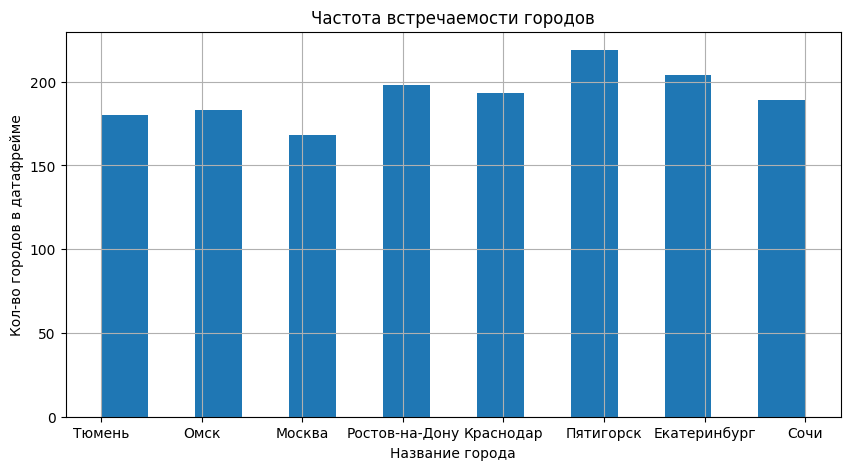

In [ ]:
data_users['city'].hist(
    bins=15,
    figsize=(10, 5)
)
plt.title('Частота встречаемости городов')
plt.xlabel('Название города')
plt.ylabel('Кол-во городов в датафрейме')
plt.show()

Также численно выведем кол-во городов:

In [ ]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

**Вывод:** Судя по гистограмме, данные по каждому городу распредлены примерно в равном кол-ве. Больше всего пользователей в Пятигорске (219 человек), а меньше всего в Москве (168 человек).

### Рассмотрим соотношение пользователей с подпиской и без подписки

Создадим новый датафрейм с кол-во пользоваталей и рассчитаем долю пользователей:

In [ ]:
data_conversion = (
    data_users['subscription_type']
    .value_counts()
    .to_frame()
    .reset_index()
)
data_conversion

,subscription_type,count
0,free,835
1,ultra,699


In [ ]:
data_conversion['conversion'] = ((data_conversion['count'] / data_conversion['count'].sum()) * 100).round(2)
data_conversion = data_conversion.rename(columns={'subscription_type':'Тип подписки', 'count':'Кол-во пользователей', 'conversion':'Доля пользователей, %'})
data_conversion

,Тип подписки,Кол-во пользователей,"Доля пользователей, %"
0,free,835,54.43
1,ultra,699,45.57


Построим столбчатую диаграмму по новому датафрейму с помощью barplot библиотеки seaborn:

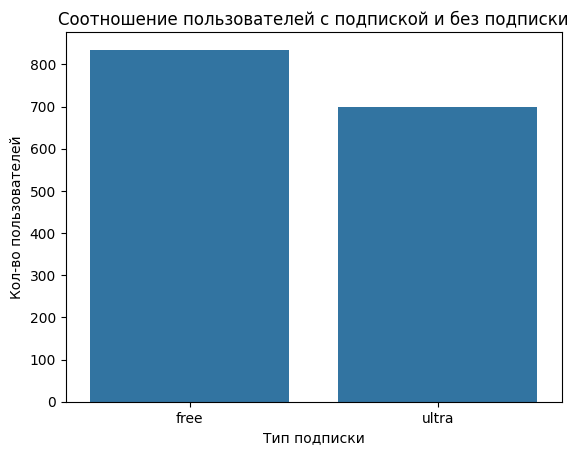

In [ ]:
sns.barplot(
    data=data_conversion,
    x='Тип подписки',
    y='Кол-во пользователей'
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Также построим круговую диаграмму:

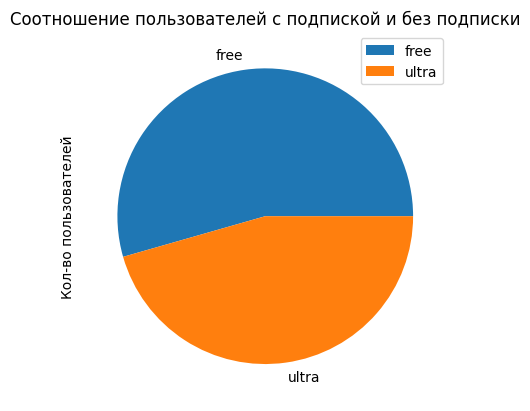

In [ ]:
data_conversion.groupby(['Тип подписки']).sum().plot(
    kind='pie',
    y='Кол-во пользователей'
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

**Вывод:** пользователей с бесплатной подпиской немного больше, чем пользователей, оплативших подписку.

### Рассмотрим возраст пользователей

Найдем минимальный и максимальный возраст пользователей:

In [ ]:
data_users['age'].min()

12

In [ ]:
data_users['age'].max()

43

Построим гистограмму возраста пользователей:

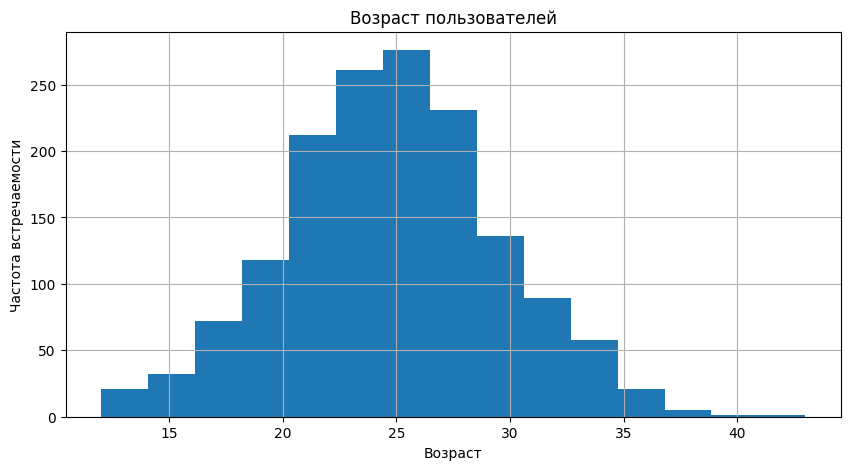

In [ ]:
data_users['age'].plot(
    kind='hist',
    bins=15,
    figsize=(10, 5),
    xlabel='Возраст',
    ylabel='Частота встречаемости',
    grid=True
)
plt.title('Возраст пользователей')
plt.show()

**Вывод:** возраст пользователей варьируется от 12 до 43 лет. При построении гистограммы можно увидеть нормальное распределение возраста. Чаще всего самокатами пользуются пользователи в возрасте от 20 до 30 лет.

### Рассмотрим расстояние, которое пользователи преодолевают за одну поездку

Построим гистограмму расстояния всех поездок:

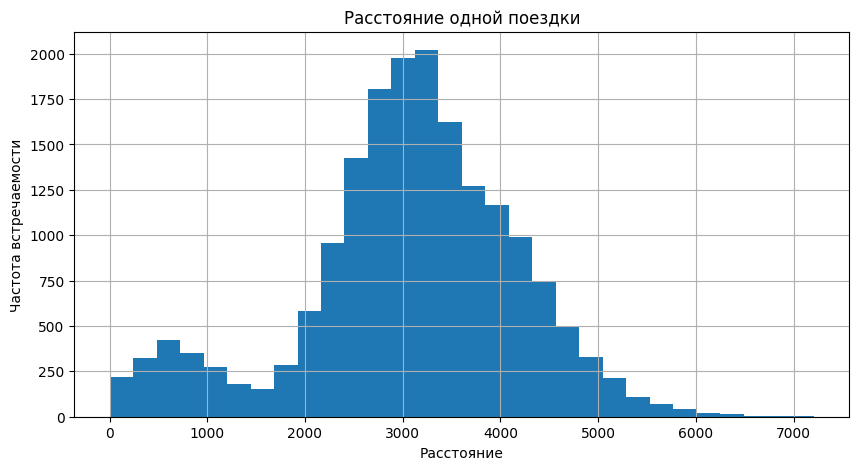

In [ ]:
data_rides['distance'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 5),
    xlabel='Расстояние',
    ylabel='Частота встречаемости',
    grid=True
)
plt.title('Расстояние одной поездки')
plt.show()

Найдем медианное значение и рассмотрим левый горб:

In [ ]:
data_rides['distance'].median().round(2)

3133.61

In [ ]:
low_distance = data_rides.loc[data_rides['distance'] <= 1000]['user_id'].count()
low_distance_conversion = (low_distance / len(data_rides['distance'])) * 100
print(f'Доля поездок до 1 км составляет: {low_distance_conversion.round(2)} %')

Доля поездок до 1 км составляет: 7.59 %


**Вывод:** медианное значение одной поездки составляет чуть больше 3 км. Это подтверждается гистограммой. Также на гистограмме можно увидеть второй горб - расстояния до 1 км - около 8 % пользователей пользуются самокатами, чтобы проехать небольшое расстояние.

### Рассмотрим продолжительность поездок

Построим гистограмму продолжительности поездок:

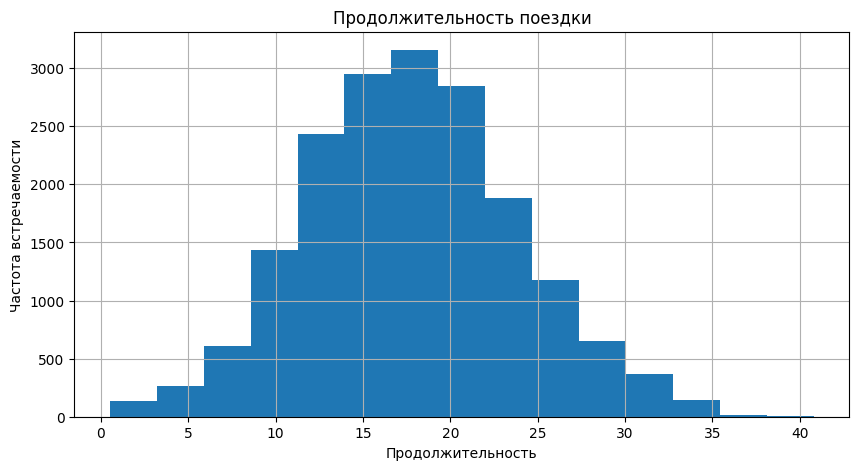

In [ ]:
data_rides['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(10, 5),
    xlabel='Продолжительность',
    ylabel='Частота встречаемости',
    grid=True
)
plt.title('Продолжительность поездки')
plt.show()

Найдем медианное значение:

In [ ]:
data_rides['duration'].median().round(2)

17.68

**Вывод:** продолжительность поездок распределена нормально, медианное значение поездки составляет почти 18 минут.

### Объединение данных

Объединим все датафреймы в один:

In [ ]:
data_merged = data_users.merge(data_subscriptions, on='subscription_type')
data_merged = data_merged.merge(data_rides, on='user_id')
data_merged.head(10)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


Создадим датафрейм пользователей без подписки:

In [ ]:
data_free = data_merged.query('subscription_type == "free"')
data_free.head(10)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2
6505,700,Айдар,22,Омск,free,8,50,0,4342.002254,22.368009,2021-02-23,2
6506,700,Айдар,22,Омск,free,8,50,0,3798.334905,18.243756,2021-03-03,3
6507,700,Айдар,22,Омск,free,8,50,0,2984.551206,15.424899,2021-04-09,4
6508,700,Айдар,22,Омск,free,8,50,0,3360.107141,16.765497,2021-06-12,6
6509,700,Айдар,22,Омск,free,8,50,0,2567.543847,11.312160,2021-06-23,6


Проверим таблицу на наличие пропусков:

In [ ]:
data_free.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
distance             0
duration             0
date                 0
month                0
dtype: int64

Создадим датафрейм пользователей c подпиской:

In [ ]:
data_ultra = data_merged.query('subscription_type == "ultra"')
data_ultra.head(10)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


Проверим таблицу на наличие пропусков:

In [ ]:
data_ultra.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
distance             0
duration             0
date                 0
month                0
dtype: int64

### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

Построим гистограммы пользоваетелей с подпиской и без подписки:

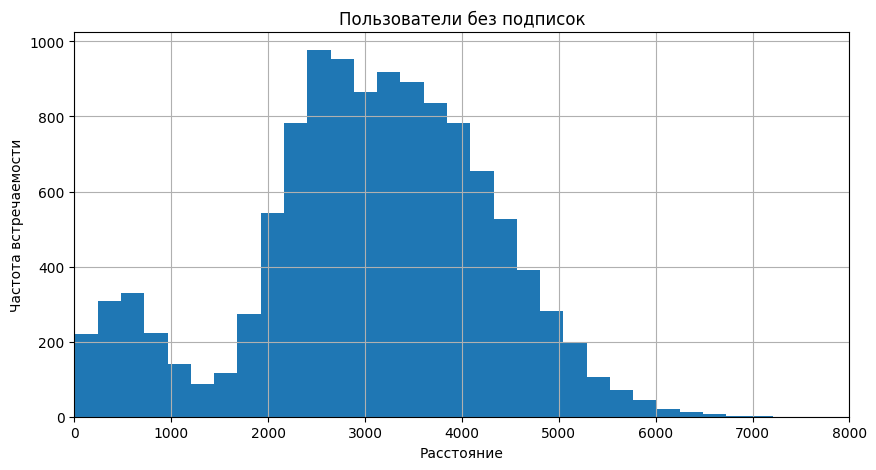

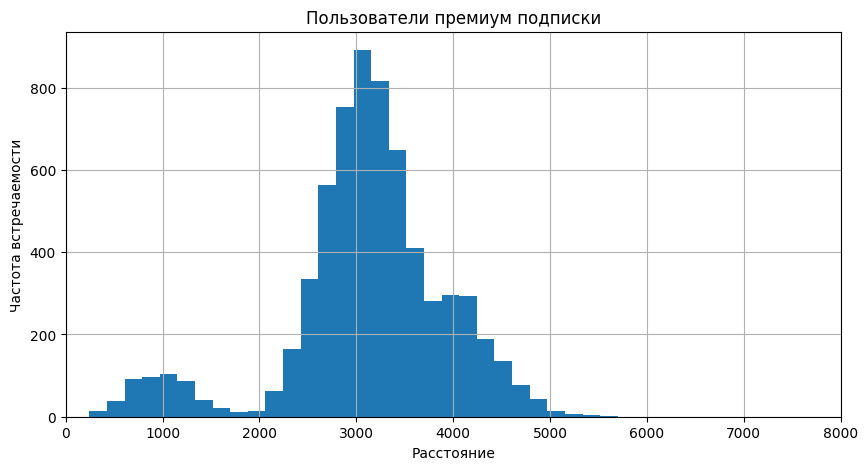

In [ ]:
# построим гистограмму пользователей без подписки
data_free['distance'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 5),
    title='free',
    xlabel='distance',
    xlim=(0, 8000),
    grid=True
)
plt.title('Пользователи без подписок')
plt.xlabel('Расстояние')
plt.ylabel('Частота встречаемости')
plt.show()

# построим гистограмму пользователей с подпиской
data_ultra['distance'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 5),
    title='ultra',
    xlabel='distance',
    xlim=(0, 8000),
    grid=True
)
plt.title('Пользователи премиум подписки')
plt.xlabel('Расстояние')
plt.ylabel('Частота встречаемости')
plt.show()

Построим гистограммы продолжительности поездок:

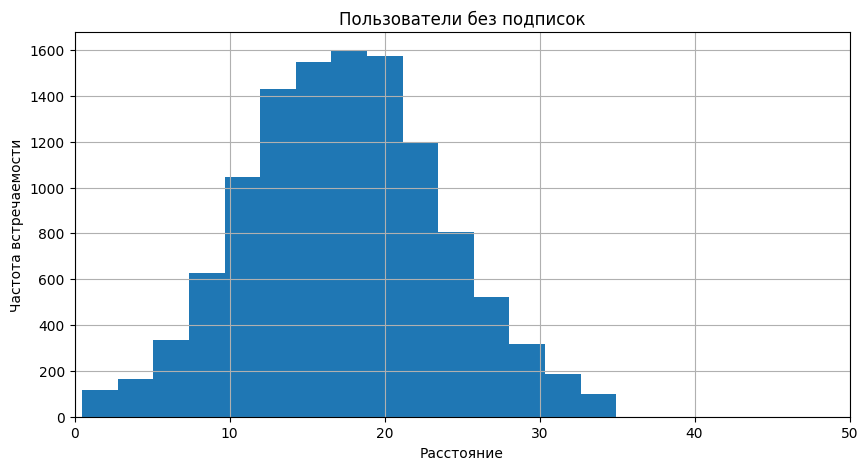

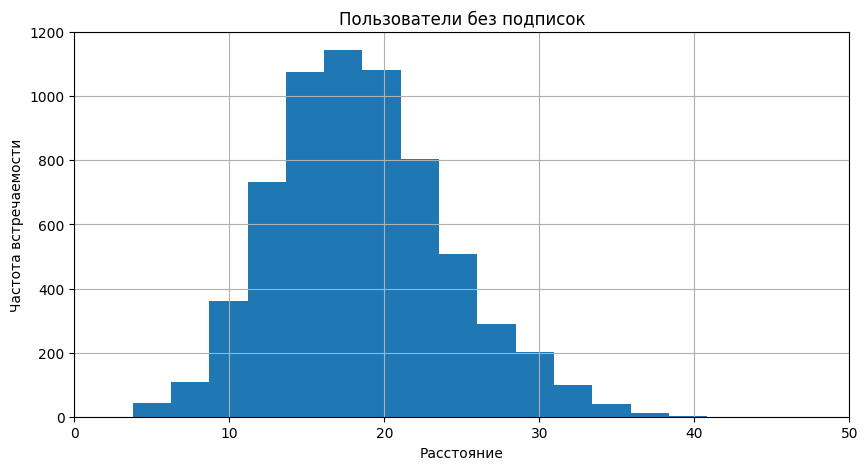

In [ ]:
#построим гистограмму пользователей без подписки
data_free['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(10, 5),
    title='free',
    xlabel='duration',
    xlim=(0, 50),
    grid=True
)
plt.title('Пользователи без подписок')
plt.xlabel('Расстояние')
plt.ylabel('Частота встречаемости')
plt.show()

#построим гистограмму пользователей с подпиской
data_ultra['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(10, 5),
    title='ultra',
    xlabel='duration',
    xlim=(0, 50),
    grid=True
)
plt.title('Пользователи без подписок')
plt.xlabel('Расстояние')
plt.ylabel('Частота встречаемости')
plt.show()

**Вывод:** на четвертом шаге были:
* сформированы общий датафрейм, содержащий данные всех трех исходных датафреймов, и два датафрейма, содержащие данные о пользователях с подпиской и пользователях без подписки;
* построены распределения расстояния и продолжительности поездок пользователей с подпиской и без подписки по двум последним датафреймам, на которых видно, что диапазон расстояний у пользователей без подписки намного шире, чем у пользователей с подпиской, а продолжительность поездок примерно схожа у пользователей с подпиской и без подписки.

### Подсчёт выручки

Создадим агрегированный датафрейм и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:

In [ ]:
aggregated_data = (
    data_merged
    .groupby(['user_id', 'month'])
    .agg({
        'distance':'sum',
        'duration':'sum',
        'minute_price':'first',
        'start_ride_price':'first',
        'subscription_type':'first',
        'subscription_fee':'first',
        'month':'count'
        })
)
aggregated_data['duration'] = np.ceil(aggregated_data['duration'])
aggregated_data.head(13)

distance  duration  minute_price  start_ride_price  \
user_id month                                                           
1       1       7027.511294      42.0             6                 0   
        4        754.159807       7.0             6                 0   
        8       6723.470560      45.0             6                 0   
        10      5809.911100      32.0             6                 0   
        11      7003.499363      54.0             6                 0   
        12      6751.629942      28.0             6                 0   
2       3      10187.723006      61.0             6                 0   
        4       6164.381824      40.0             6                 0   
        6       3255.338202      14.0             6                 0   
        7       6780.722964      47.0             6                 0   
        8        923.007439       7.0             6                 0   
        10      2824.636598      19.0             6                 0   
        12      3828.248580      12.0             6                 0   

              subscription_type  subscription_fee  month  
user_id month                                             
1       1                 ultra               199      2  
        4                 ultra               199      1  
        8                 ultra               199      2  
        10                ultra               199      2  
        11                ultra               199      3  
        12                ultra               199      2  
2       3                 ultra               199      3  
        4                 ultra               199      2  
        6                 ultra               199      1  
        7                 ultra               199      2  
        8                 ultra               199      1  
        10                ultra               199      1  
        12                ultra               199      1

Добавим столбец ежемесячной выручки с каждого пользователя:

In [ ]:
def income(row):
    type = row['subscription_type']
    start_price = row['start_ride_price']
    month = row['month']
    minute_price = row['minute_price']
    duration = row['duration']
    fee = row['subscription_fee']

    if type == 'ultra':
        return minute_price * duration + fee
    else:
        return start_price * month + minute_price * duration


aggregated_data['monthly_income'] = aggregated_data.apply(income, axis=1)
aggregated_data

distance  duration  minute_price  start_ride_price  \
user_id month                                                           
1       1       7027.511294      42.0             6                 0   
        4        754.159807       7.0             6                 0   
        8       6723.470560      45.0             6                 0   
        10      5809.911100      32.0             6                 0   
        11      7003.499363      54.0             6                 0   
...                     ...       ...           ...               ...   
1534    6       3409.468534      25.0             8                50   
        8       7622.453034      48.0             8                50   
        9       4928.173852      23.0             8                50   
        11     13350.015305      77.0             8                50   
        12      2371.711192      16.0             8                50   

              subscription_type  subscription_fee  month  monthly_income  
user_id month                                                             
1       1                 ultra               199      2           451.0  
        4                 ultra               199      1           241.0  
        8                 ultra               199      2           469.0  
        10                ultra               199      2           391.0  
        11                ultra               199      3           523.0  
...                         ...               ...    ...             ...  
1534    6                  free                 0      2           300.0  
        8                  free                 0      2           484.0  
        9                  free                 0      1           234.0  
        11                 free                 0      4           816.0  
        12                 free                 0      1           178.0  

[11331 rows x 8 columns]

**Вывод:** на пятом шаге был создан агрегированный датафрейм, в котором были произведены расчеты суммарного расстояния, количества поездок, суммарного времени для каждого пользователя за каждый месяц и ежемесячной выручки с каждого пользователя.

## Проверка гипотез

### Гипотеза 1

**Нулевая гипотеза:** пользователи с подпиской тратят столько же времени времени на поездки, сколько пользователи без подписки.

**Альтернативная гипотеза:** пользователи с подпиской тратят больше времени на поездки.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'],
    data_free['duration'],
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем гипотезу


**Вывод:** так как p-value меньше статистической значимости, значит пользователи с подпиской тратят больше времени на поездки.

### Гипотеза 2


**Нулевая гипотеза:** cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

**Альтернативная гипотеза:** пользователи в среднем за одну поездку проезжают расстояние больше оптимального 3130 метров, подвергая самокат износу.

In [ ]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'],
    interested_value,
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-value: 0.9195368847849785
Не получилось отвергнуть гипотезу


**Вывод:** так как p-value больше статистической значимости, значит пользователи с подпиской в среднем преодолевают примерно 3130 метров.

### Гипотеза 3

**Нулевая гипотеза:** помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки.

**Альтернативная гипотеза:** помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
ultra = aggregated_data.query('subscription_type == "ultra"')
free = aggregated_data.query('subscription_type == "free"')

alpha = 0.05

results = st.ttest_ind(
    ultra['monthly_income'],
    free['monthly_income'],
    alternative='greater'
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


**Вывод:** помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

## Общий вывод


В данной проектной работе было проведено исследование сервиса аренды самокатов GoFast.

На стадии предобработки данных были устранены явные дубликаты, так как их количество (1.98 % от всех значений) не превышало 5 %, значит существенного влияния на последудующий анализ не оказало, а также изменен тип данных столбца 'date' с object на datetime. Пропущенных значений и неявных дубликатов не было обнаружено.

На стадии исследовательского анализа данных были описаны и визуализированы следующие распределения:
1. частота встречаемости городов - в исходных данных представлено примерно равное количество информации по каждому городу;
2. соотношение пользователей с подпиской и без подписки - количество пользователей без подписки немного превышает;
3. возраст пользователей - на гистограмме представлено нормальное распредление возраста, которое варьируется от 12 до 43 лет;
4. расстояние, которое пользователь преодолел за одну поездку - медианное значение одной поездки составляет чуть больше 3 км, что также видно на гистограмме;
5. продолжительность поездок - продолжительность распределена нормально, медианное значение поездки составляет почти 18 минут.

Для подготовки к статистическому анализу был создан агрегированный датафрейм, в котором были произведены расчеты суммарного расстояния, количества поездок, суммарного времени для каждого пользователя за каждый месяц и ежемесячной выручки с каждого пользователя.

На стадии статистического анализа были рассмотрены три гипотезы:
1. тратят ли пользователи с подпиской больше времени на поездки? Для проверки был применен метод st.ttest_ind(), так как в данном случае проверяются две независимые выборки. В результате исследования, p-value оказалось меньше статистической значимости, значит пользователи с подпиской тратят больше времени на поездки;
2. превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, 3130 метров? Для проверки односторонней гипотезы использовался метод st.ttest_1samp(), так как анализировалась одна выборка. Гипотезу опровергнуть не получилось, действительно пользователи с подпиской в среднем преодолевают примерно 3130 метров;
3. выше ли помесячная выручка от пользователей с подпиской по месяцам, чем выручка от пользователей без подписки? В этом случае также проверяется односторонняя гипотеза методом st.ttest_1samp(). В результате, нулевая гипотеза отвержена, можно сделать вывод, что выручка от пользователей с подпиской выше, чем от пользователей без подписки.